In [45]:
# import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [46]:
!python --version

Python 3.11.11


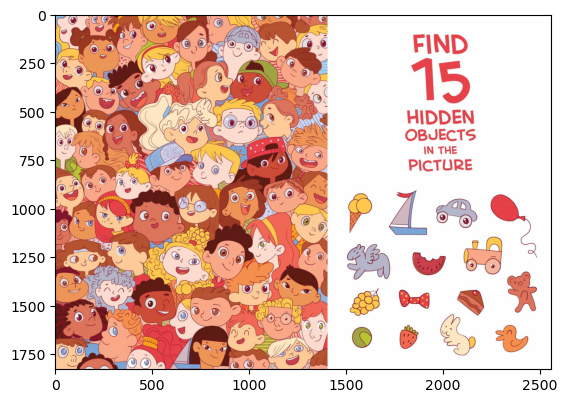

In [47]:
# load the target image
image = cv2.imread('Midterm-ImageSet/Finding/1.jpg')
# convert brg to rgb because opencv loads imgs in brg
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# display the image using matplotlib
plt.imshow(image_rgb)


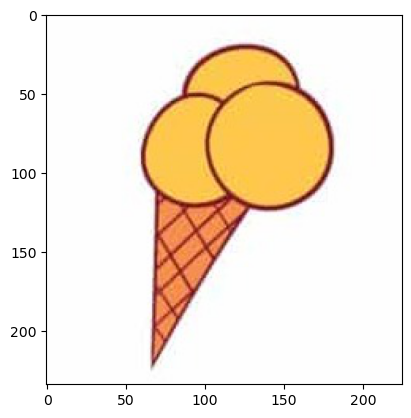

In [48]:
# list the template images
templates1 = ["ball","baloon","bear","bow","boat","bunny","cake","car","duck",
              "grape","horse","icecream","strawberry""watermelon","wood"]
# the path of templates
template_path = f"Templates1/{templates1[11]}.jpg"
# load the templates image
template = cv2.imread(template_path)
# convert brg to rgb because opencv loads imgs in brg
template_rgb = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
# display the image using matplotlib
plt.imshow(template_rgb)

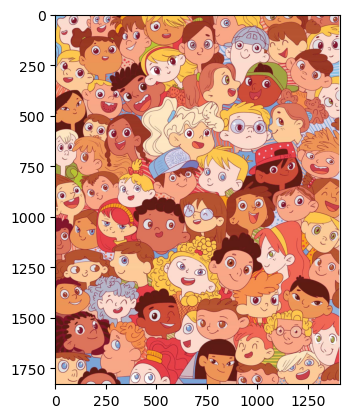

In [49]:
# load the cropped image
cropped = cv2.imread('CropImg/cropped_1.jpg')
# convert brg to rgb because opencv loads imgs in brg
cropped_rgb = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)
# display the image using matplotlib
plt.imshow(cropped_rgb)


In [50]:
# test with scale factor = 0.7
scale_factor = 0.7
image_gray = cv2.cvtColor(cropped_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread(template_path)
template_rgb = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)

new_width = int(template_rgb.shape[1] * scale_factor)
new_height = int(template_rgb.shape[0] * scale_factor)
template_rgb_resize = cv2.resize(template_rgb, (new_width, new_height), interpolation=cv2.INTER_AREA)

# Convert the template to grayscale
template_gray = cv2.cvtColor(template_rgb_resize, cv2.COLOR_RGB2GRAY)

_, mask = cv2.threshold(template_gray, 240, 255, cv2.THRESH_BINARY_INV)

template_h, template_w = template_gray.shape[:2]

result = cv2.matchTemplate(image_gray, template_gray, cv2.TM_SQDIFF_NORMED, mask=mask)

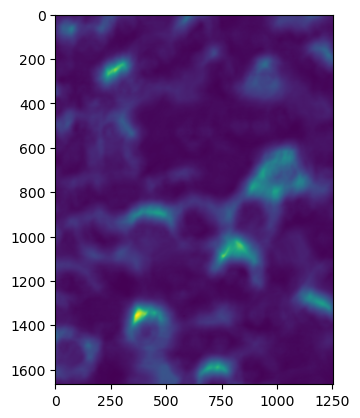

In [51]:
plt.imshow(result)

min_val: 0.06653976440429688, max_val: 2.560850143432617


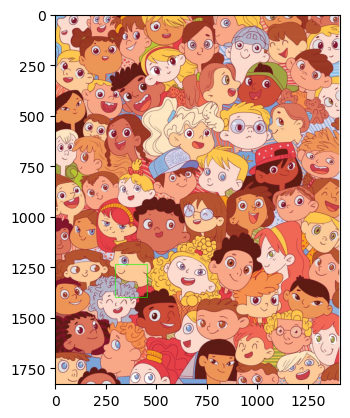

In [52]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
print(f"min_val: {min_val}, max_val: {max_val}")
# Draw the rectangle around the best match
top_left = min_loc
bottom_right = (top_left[0] + new_width, top_left[1] + new_height)
cv2.rectangle(cropped_rgb, top_left, bottom_right, (0, 255, 0), 2)
plt.imshow(cropped_rgb)
# min_val: 0.05337528511881828, max_val: 3.0357589721679688

In [53]:
! pip install imutils